# Simple pyosys synthesis example


Run this when you want to prefer a locally installed version (mounted, etc.)

In [1]:
import sys
sys.path.insert(0, "/home/pyosys/myhdl/myhdl-upstream")

These are some auxiliaries for common test routines (run once):

In [4]:
import graphviz

def to_svg(design):
    design.display_rtl("", fmt="dot")

    f = open(design.name + ".dot")
    dot_graph = f.read()

    return graphviz.Source(dot_graph)


Simple example of a XOR synthesis element:

Setting context <myhdl.conversion.yshelper.Design object at 0x7fcb28cc9588>
CREATE Module: 'test'
Adding module with name: test_1_8_8
CONVERT_RTL instance 'test' 
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
clk
VISIT INSTANCES
DONE instancing submodules
Display...


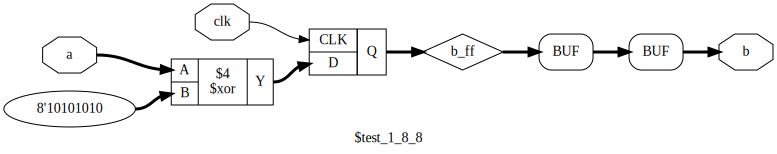

In [5]:
from myhdl.conversion import yshelper
from myhdl import *

@block
def test(clk, a, b):
    @always(clk.posedge)
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

a, b = [ Signal(intbv()[8:]) for i in range(2) ]
clk = Signal(bool())
design = yshelper.Design("test")
inst = test(clk, a, b)
inst.convert("yosys_module", design, name="test", trace=True)

display(to_svg(design))
